# Link data set

In [1]:
import pandas as pd

In [4]:
url = "https://github.com/Annette0907/2406PTDS_Regression_Project/raw/main/co2_emissions_from_agri.csv"

In [5]:
# Load the dataset into a DataFrame

df = pd.read_csv(url)

In [6]:
# Display the first 10 rows

print(df.head(10))

          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   
5  Afghanistan  1995        14.7237        0.0557       243.8152   
6  Afghanistan  1996        38.9302        0.2014       249.0364   
7  Afghanistan  1997        30.9378        0.1193       276.2940   
8  Afghanistan  1998        64.1411        0.3263       287.4346   
9  Afghanistan  1999        46.1683        0.0895       247.4980   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.

In [7]:
# See an overview of the dataset

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

# Data Cleanup

In [9]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values for the 'Drained organic soils (CO2)' column with its mean
df['Drained organic soils (CO2)'] = df['Drained organic soils (CO2)'].fillna(df['Drained organic soils (CO2)'].mean())

# Forward-fill missing values for the 'Area' column
df['Area'] = df['Area'].ffill()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [10]:
# Convert columns to appropriate types if necessary
df['Year'] = df['Year'].astype(int)  # Convert 'Year' to integer if it's not already done
df['Area'] = df['Area'].astype('category')  # Convert 'Area' to category if it's categorical

In [11]:
# Example of using IQR to identify outliers in 'Drained organic soils (CO2)'
Q1 = df['Drained organic soils (CO2)'].quantile(0.25)
Q3 = df['Drained organic soils (CO2)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Drained organic soils (CO2)'] >= lower_bound) & (df['Drained organic soils (CO2)'] <= upper_bound)]

In [12]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")

# Remove duplicates
df.drop_duplicates(inplace=True)

Number of duplicates: 0


In [13]:
# Standardise units and ranges if needed, e.g., if CO2 was in kg, convert it to kt
if df['Drained organic soils (CO2)'].max() > 1_000_000:  # Arbitrary threshold for large values
    df['Drained organic soils (CO2)'] = df['Drained organic soils (CO2)'] / 1000
    print("Converted 'Drained organic soils (CO2)' from kg to kt.")

In [14]:
# Example: One-hot encode the 'Area' column
df = pd.get_dummies(df, columns=['Area'], drop_first=True)

In [15]:
df.to_csv('cleaned_data.csv', index=False)

# link to the cleaned dataset

In [16]:
# new URL of the cleaned dataset in your GitHub repository
url = "https://raw.githubusercontent.com/Annette0907/2406PTDS_Regression_Project/main/cleaned_data.csv"

# Load the dataset
df_cleaned = pd.read_csv(url)

# Display the first few rows to confirm loading
print(df_cleaned.head(10))

   Year  Savanna fires  Forest fires  Crop Residues  Rice Cultivation  \
0  1990        14.7237        0.0557       205.6077            686.00   
1  1991        14.7237        0.0557       209.4971            678.16   
2  1992        14.7237        0.0557       196.5341            686.00   
3  1993        14.7237        0.0557       230.8175            686.00   
4  1994        14.7237        0.0557       242.0494            705.60   
5  1995        14.7237        0.0557       243.8152            666.40   
6  1996        38.9302        0.2014       249.0364            686.00   
7  1997        30.9378        0.1193       276.2940            705.60   
8  1998        64.1411        0.3263       287.4346            705.60   
9  1999        46.1683        0.0895       247.4980            548.80   

   Drained organic soils (CO2)  Pesticides Manufacturing  Food Transport  \
0                          0.0                 11.807483         63.1152   
1                          0.0              

# Using MAE

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

## Preditc Avarage Temperatures with MAE

In [5]:
# Load the cleaned dataset and create dataframe
url = "https://raw.githubusercontent.com/Annette0907/2406PTDS_Regression_Project/main/cleaned_data.csv"
df_cleaned = pd.read_csv(url)

# Predict Average Temperature °C
target_col_temp = 'Average Temperature °C'
feature_cols_temp = df_cleaned.columns[df_cleaned.columns != target_col_temp]

# Split the data into features (X) and target (y) for temperature
X_temp = df_cleaned[feature_cols_temp]
y_temp = df_cleaned[target_col_temp]

# Impute missing values in the feature set with the mean
imputer = SimpleImputer(strategy='mean')
X_temp_imputed = imputer.fit_transform(X_temp)

# Train-test split for temperature prediction
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(X_temp_imputed, y_temp, test_size=0.2, random_state=42)

# Train a Linear Regression model for temperature
model_temp = LinearRegression()
model_temp.fit(X_temp_train, y_temp_train)

# Predict and calculate MAE for temperature
y_temp_pred = model_temp.predict(X_temp_test)
mae_temp = mean_absolute_error(y_temp_test, y_temp_pred)
print(f"Mean Absolute Error (MAE) for Average Temperature: {mae_temp}")

Mean Absolute Error (MAE) for Average Temperature: 0.2885916644424121


## Predict Total Emmissions

In [ ]:
# Load the cleaned dataset and create dataframe
url = "https://raw.githubusercontent.com/Annette0907/2406PTDS_Regression_Project/main/cleaned_data.csv"
df_cleaned = pd.read_csv(url)

# Set target and feature columns for emissions
target_col_emission = 'total_emission'
feature_cols_emission = df_cleaned.columns[df_cleaned.columns != target_col_emission]

# Split the data into features (X) and target (y) for emissions
X_emission = df_cleaned[feature_cols_emission]
y_emission = df_cleaned[target_col_emission]

# Impute missing values in the feature set
imputer = SimpleImputer(strategy='mean')
X_emission_imputed = imputer.fit_transform(X_emission)

# Train-test split for emissions prediction
X_emission_train, X_emission_test, y_emission_train, y_emission_test = train_test_split(
    X_emission_imputed, y_emission, test_size=0.2, random_state=42
)

# Train a Linear Regression model for emissions
model_emission = LinearRegression()
model_emission.fit(X_emission_train, y_emission_train)

# Predict and calculate MAE for emissions
y_emission_pred = model_emission.predict(X_emission_test)
mae_emission = mean_absolute_error(y_emission_test, y_emission_pred)
print(f"Mean Absolute Error (MAE) for Total Emission: {mae_emission}")

Mean Absolute Error (MAE) for Total Emission: 39.18931584148734


# Using MSE

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

## Predict Average Temperature

In [11]:
# Load the cleaned dataset and create dataframe
url = "https://raw.githubusercontent.com/Annette0907/2406PTDS_Regression_Project/main/cleaned_data.csv"
df_cleaned = pd.read_csv(url)

# Set target and feature columns for temperature prediction
target_col_temp = 'Average Temperature °C'
feature_cols_temp = df_cleaned.columns[df_cleaned.columns != target_col_temp]

# Split the data into features (X) and target (y) for temperature
X_temp = df_cleaned[feature_cols_temp]
y_temp = df_cleaned[target_col_temp]

# Impute missing values in the feature set
imputer = SimpleImputer(strategy='mean')
X_temp_imputed = imputer.fit_transform(X_temp)

# Train-test split for temperature prediction
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(X_temp_imputed, y_temp, test_size=0.2, random_state=42)

# Train a Linear Regression model for temperature
model_temp = LinearRegression()
model_temp.fit(X_temp_train, y_temp_train)

# Predict and calculate MSE for temperature
y_temp_pred = model_temp.predict(X_temp_test)
mse_temp = mean_squared_error(y_temp_test, y_temp_pred)
print(f"Mean Squared Error (MSE) for Average Temperature: {mse_temp}")

Mean Squared Error (MSE) for Average Temperature: 0.15327602045186448


## Predict Total Emmissions

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [14]:
# Load the cleaned dataset and create dataframe
url = "https://raw.githubusercontent.com/Annette0907/2406PTDS_Regression_Project/main/cleaned_data.csv"
df_cleaned = pd.read_csv(url)

# Set target and feature columns for emissions prediction
target_col_emission = 'total_emission'
feature_cols_emission = df_cleaned.columns[df_cleaned.columns != target_col_emission]

# Split the data into features (X) and target (y) for emissions
X_emission = df_cleaned[feature_cols_emission]
y_emission = df_cleaned[target_col_emission]

# Impute missing values in the feature set
imputer = SimpleImputer(strategy='mean')
X_emission_imputed = imputer.fit_transform(X_emission)

# Train-test split for emissions prediction
X_emission_train, X_emission_test, y_emission_train, y_emission_test = train_test_split(
    X_emission_imputed, y_emission, test_size=0.2, random_state=42)

# Train a Linear Regression model for emissions
model_emission = LinearRegression()
model_emission.fit(X_emission_train, y_emission_train)

# Predict and calculate MSE for emissions
y_emission_pred = model_emission.predict(X_emission_test)
mse_emission = mean_squared_error(y_emission_test, y_emission_pred)
print(f"Mean Squared Error (MSE) for Total Emission: {mse_emission}")

Mean Squared Error (MSE) for Total Emission: 16055.710140033041


# Using RMSE

## Predict Average Temperature

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [4]:
# Load the cleaned dataset and create dataframe
url = "https://raw.githubusercontent.com/Annette0907/2406PTDS_Regression_Project/main/cleaned_data.csv"
df_cleaned = pd.read_csv(url)

# Set target and feature columns for temperature prediction
target_col_temp = 'Average Temperature °C'
feature_cols_temp = df_cleaned.columns[df_cleaned.columns != target_col_temp]

# Split the data into features (X) and target (y) for temperature
X_temp = df_cleaned[feature_cols_temp]
y_temp = df_cleaned[target_col_temp]

# Impute missing values in the feature set
imputer = SimpleImputer(strategy='mean')
X_temp_imputed = imputer.fit_transform(X_temp)

# Train-test split for temperature prediction
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(
    X_temp_imputed, y_temp, test_size=0.2, random_state=42)

# Train a Linear Regression model for temperature
model_temp = LinearRegression()
model_temp.fit(X_temp_train, y_temp_train)

# Predict and calculate RMSE for temperature
y_temp_pred = model_temp.predict(X_temp_test)
rmse_temp = np.sqrt(mean_squared_error(y_temp_test, y_temp_pred))
print(f"Root Mean Squared Error (RMSE) for Average Temperature: {rmse_temp}")

Root Mean Squared Error (RMSE) for Average Temperature: 0.3915048153622947


## Predict Total Emissions

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [7]:
# Load the cleaned dataset & Ceate dataframe
url = "https://raw.githubusercontent.com/Annette0907/2406PTDS_Regression_Project/main/cleaned_data.csv"
df_cleaned = pd.read_csv(url)

# Predict Total Emission
target_col_emission = 'total_emission'
feature_cols_emission = df_cleaned.columns[df_cleaned.columns != target_col_emission]

# Split the data into features (X) and target (y) for emissions
X_emission = df_cleaned[feature_cols_emission]
y_emission = df_cleaned[target_col_emission]

# Impute missing values in the feature set
imputer = SimpleImputer(strategy='mean')
X_emission_imputed = imputer.fit_transform(X_emission)

# Train-test split for emissions prediction
X_emission_train, X_emission_test, y_emission_train, y_emission_test = train_test_split(
    X_emission_imputed, y_emission, test_size=0.2, random_state=42)

# Train a Linear Regression model for emissions
model_emission = LinearRegression()
model_emission.fit(X_emission_train, y_emission_train)

# Predict and calculate RMSE for emissions
y_emission_pred = model_emission.predict(X_emission_test)
rmse_emission = np.sqrt(mean_squared_error(y_emission_test, y_emission_pred))
print(f"Root Mean Squared Error (RMSE) for Total Emission: {rmse_emission}")

Root Mean Squared Error (RMSE) for Total Emission: 126.71112871422558


# Using R-Squared

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

## Predict Average Temperatures

In [6]:
# Load the cleaned dataset
url = "https://raw.githubusercontent.com/Annette0907/2406PTDS_Regression_Project/main/cleaned_data.csv"
df_cleaned = pd.read_csv(url)

# Predict Average Temperature °C
target_col_temp = 'Average Temperature °C'
feature_cols_temp = df_cleaned.columns[df_cleaned.columns != target_col_temp]

# Split the data into features (X) and target (y) for temperature
X_temp = df_cleaned[feature_cols_temp]
y_temp = df_cleaned[target_col_temp]

# Impute missing values in the feature set
imputer = SimpleImputer(strategy='mean')
X_temp_imputed = imputer.fit_transform(X_temp)

# Train-test split for temperature prediction
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(
    X_temp_imputed, y_temp, test_size=0.2, random_state=42)

# Train a Linear Regression model for temperature
model_temp = LinearRegression()
model_temp.fit(X_temp_train, y_temp_train)

# Predict and calculate R-squared for temperature
y_temp_pred = model_temp.predict(X_temp_test)
r2_temp = r2_score(y_temp_test, y_temp_pred)
print(f"R-squared for Average Temperature: {r2_temp}")

R-squared for Average Temperature: 0.4396513009783808


## Predict Total Emissions

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

In [9]:
# Load the cleaned dataset
url = "https://raw.githubusercontent.com/Annette0907/2406PTDS_Regression_Project/main/cleaned_data.csv"
df_cleaned = pd.read_csv(url)

# Predict Total Emission
target_col_emission = 'total_emission'
feature_cols_emission = df_cleaned.columns[df_cleaned.columns != target_col_emission]

# Split the data into features (X) and target (y) for emissions
X_emission = df_cleaned[feature_cols_emission]
y_emission = df_cleaned[target_col_emission]

# Impute missing values in the feature set
imputer = SimpleImputer(strategy='mean')
X_emission_imputed = imputer.fit_transform(X_emission)

# Train-test split for emissions prediction
X_emission_train, X_emission_test, y_emission_train, y_emission_test = train_test_split(
    X_emission_imputed, y_emission, test_size=0.2, random_state=42)

# Train a Linear Regression model for emissions
model_emission = LinearRegression()
model_emission.fit(X_emission_train, y_emission_train)

# Predict and calculate R-squared for emissions
y_emission_pred = model_emission.predict(X_emission_test)
r2_emission = r2_score(y_emission_test, y_emission_pred)
print(f"R-squared for Total Emission: {r2_emission}")

R-squared for Total Emission: 0.9999989113867127


# Visualise Predicted Average Temperature

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

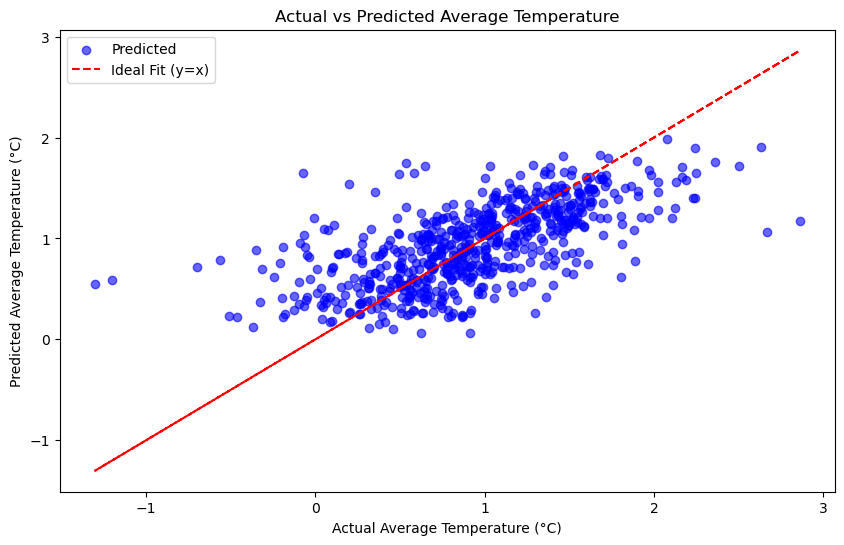

In [5]:
url = "https://raw.githubusercontent.com/Annette0907/2406PTDS_Regression_Project/main/cleaned_data.csv"
df_cleaned = pd.read_csv(url)

# Specify target and feature columns for Average Temperature prediction
target_col_temp = 'Average Temperature °C'
feature_cols_temp = df_cleaned.columns[df_cleaned.columns != target_col_temp]

# Split dataset into features and target
X_temp = df_cleaned[feature_cols_temp]
y_temp = df_cleaned[target_col_temp]

# Handle missing values by dropping rows with NaN values
X_temp = X_temp.dropna()
y_temp = y_temp[X_temp.index]

# Train-test split for temperature prediction
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Define and fit Linear Regression model
model_temp = LinearRegression()
model_temp.fit(X_temp_train, y_temp_train)

# Predict on test data
y_temp_pred = model_temp.predict(X_temp_test)

# Visualization of Actual vs Predicted Average Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_temp_test, y_temp_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot(y_temp_test, y_temp_test, color='red', linestyle='--', label='Ideal Fit (y=x)')
plt.xlabel("Actual Average Temperature (°C)")
plt.ylabel("Predicted Average Temperature (°C)")
plt.title("Actual vs Predicted Average Temperature")
plt.legend()
plt.show()

# Visualise Predicted Total Emissions

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

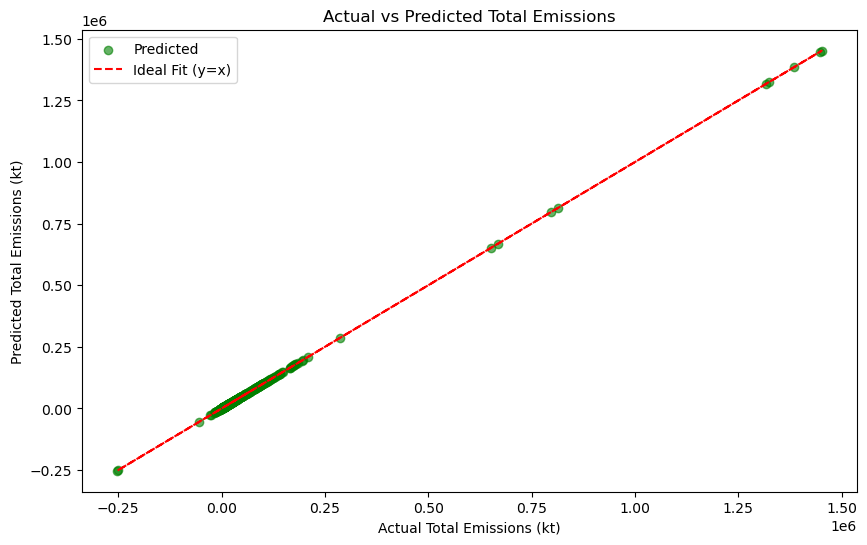

In [8]:
# Load the cleaned dataset
url = "https://raw.githubusercontent.com/Annette0907/2406PTDS_Regression_Project/main/cleaned_data.csv"
df_cleaned = pd.read_csv(url)

# Specify target and feature columns for Total Emission prediction
target_col_emission = 'total_emission'
feature_cols_emission = df_cleaned.columns[df_cleaned.columns != target_col_emission]

# Split dataset into features and target for emissions
X_emission = df_cleaned[feature_cols_emission]
y_emission = df_cleaned[target_col_emission]

# Handle missing values by dropping rows with NaN values
X_emission = X_emission.dropna()
y_emission = y_emission[X_emission.index]

# Train-test split for emissions prediction
X_emission_train, X_emission_test, y_emission_train, y_emission_test = train_test_split(
    X_emission, y_emission, test_size=0.2, random_state=42
)

# Define and fit Linear Regression model for emissions
model_emission = LinearRegression()
model_emission.fit(X_emission_train, y_emission_train)

# Predict on test data
y_emission_pred = model_emission.predict(X_emission_test)

# Visualization of Actual vs Predicted Total Emissions
plt.figure(figsize=(10, 6))
plt.scatter(y_emission_test, y_emission_pred, color='green', alpha=0.6, label='Predicted')
plt.plot(y_emission_test, y_emission_test, color='red', linestyle='--', label='Ideal Fit (y=x)')
plt.xlabel("Actual Total Emissions (kt)")
plt.ylabel("Predicted Total Emissions (kt)")
plt.title("Actual vs Predicted Total Emissions")
plt.legend()
plt.show()